In [2]:
import gc
import scanit
import torch
import random
import scanpy as sc
import pandas as pd
import anndata
import numpy as np
import SpatialDE
from scipy import sparse
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import SpectralClustering, KMeans
import matplotlib.pyplot as plt
import stlearn as st
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import normalized_mutual_info_score

In [3]:
adata73 = sc.read_h5ad('/Users/oliviaguo/Documents/Undergraduate/Year2/M2R_Graph-based_Clustering/151673.h5ad')

# Preprocessing
adata73_sp = adata73.copy()
sc.pp.normalize_total(adata73_sp)
gene = adata73_sp.X.toarray()
gene_df = pd.DataFrame(gene, index=adata73_sp.obs_names, columns=adata73_sp.var_names)
pts = adata73_sp.obsm["spatial"]
pts_df = pd.DataFrame(pts, index=adata73_sp.obs_names, columns=["x", "y"])
gene_df.index.name, pts_df.index.name = "index", "index"
results = SpatialDE.run(pts_df, gene_df)
svg_genes = results[results['qval'] < 0.05]

sc.pp.log1p(adata73_sp)

Models: 100%|██████████| 10/10 [48:26<00:00, 290.67s/it]


In [102]:
n_sv_genes = 3000
top_sv_genes = svg_genes.sort_values("qval").head(n_sv_genes)
svg = list(top_sv_genes["g"])
adata73_sp = adata73[:, svg]

In [103]:
adata73_sp = adata73_sp.copy()
adata73_sp.X = adata73_sp.X.toarray()
print(adata73_sp.shape)
print(type(adata73_sp.X))

(3639, 3000)
<class 'numpy.ndarray'>


In [125]:
scanit.tl.spatial_graph(adata73_sp, method='alpha shape', alpha_n_layer=1, knn_n_neighbors=5)
scanit.tl.spatial_representation(adata73_sp, n_h=10, n_epoch=3000, lr=0.001, device='mps', n_consensus=3, projection='mds', 
python_seed=0, torch_seed=0, numpy_seed=0, n_comps_proj = 10)

Epoch: 000, Loss: 1.3984
Epoch: 500, Loss: 0.0805
Epoch: 1000, Loss: 0.0433
Epoch: 1500, Loss: 0.0347
Epoch: 2000, Loss: 0.0414
Epoch: 2500, Loss: 0.0190
Epoch: 2999, Loss: 0.0255
Epoch: 000, Loss: 2.9165
Epoch: 500, Loss: 0.0520
Epoch: 1000, Loss: 0.0317
Epoch: 1500, Loss: 0.0167
Epoch: 2000, Loss: 0.0202
Epoch: 2500, Loss: 0.0234
Epoch: 2999, Loss: 0.0142
Epoch: 000, Loss: 1.4978
Epoch: 500, Loss: 0.0580
Epoch: 1000, Loss: 0.0179
Epoch: 1500, Loss: 0.0113
Epoch: 2000, Loss: 0.0138
Epoch: 2500, Loss: 0.0075
Epoch: 2999, Loss: 0.0134


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

In [126]:
nmis = []
encoder = LabelEncoder()
flat_arr = np.array(adata73_sp.obs['sce.layer_guess']).ravel()
encoder.fit(flat_arr)
label_true = encoder.transform(flat_arr)
sc.pp.neighbors(adata73_sp, use_rep='X_scanit', n_neighbors=10)
sc.tl.leiden(adata73_sp, resolution=0.15)
label_pred = np.array(adata73_sp.obs['leiden'], dtype=int)
normalized_mutual_info_score(label_true, label_pred)

0.6255706003661423

In [ ]:
scanit.tl.spatial_graph(adata73_sp, method='alpha shape', alpha_n_layer=1, knn_n_neighbors=5)
scanit.tl.spatial_representation(adata73_sp, n_h=10, n_epoch=3000, lr=0.001, device='mps', n_consensus=3, projection='mds', 
                                 python_seed=0, torch_seed=0, numpy_seed=0, n_comps_proj=10)

Epoch: 000, Loss: 1.3984
Epoch: 500, Loss: 0.0805
Epoch: 1000, Loss: 0.0325
Epoch: 1500, Loss: 0.0262
Epoch: 2000, Loss: 0.0335
Epoch: 2500, Loss: 0.0130
Epoch: 2999, Loss: 0.0206
Epoch: 000, Loss: 2.9165
Epoch: 500, Loss: 0.0545
Epoch: 1000, Loss: 0.0305
Epoch: 1500, Loss: 0.0165
Epoch: 2000, Loss: 0.0184
Epoch: 2500, Loss: 0.0274
Epoch: 2999, Loss: 0.0123
Epoch: 000, Loss: 1.4978
Epoch: 500, Loss: 0.0581
Epoch: 1000, Loss: 0.0180
Epoch: 1500, Loss: 0.0113
Epoch: 2000, Loss: 0.0144
Epoch: 2500, Loss: 0.0176
Epoch: 2999, Loss: 0.0123


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

In [87]:
array = np.zeros(20)
for i in range(1, 21):
    adata73_s = adata73_sp.copy()
    scanit.tl.spatial_graph(adata73_s, method='alpha shape', alpha_n_layer=1, knn_n_neighbors=5)
    scanit.tl.spatial_representation(adata73_s, n_h=10, n_epoch=2000, lr=0.001, device='mps', n_consensus=1, projection='mds', 
    python_seed=0, torch_seed=0, numpy_seed=0, n_comps_proj = i)
    X_scanit = adata73_s.obsm['X_scanit']
    # builds a graph of similar cells/spots based on the existing low-dimensional SCAN-IT embedding.
    sc.pp.neighbors(adata73_s, use_rep='X_scanit', n_neighbors=10)
    # finds clusters within that graph using Leiden clustering algorithm.
    sc.tl.leiden(adata73_s, resolution=0.13)
    encoder = LabelEncoder()
    flat_arr = np.array([adata73_s.obs['sce.layer_guess']]).ravel()
    encoder.fit(flat_arr)
    label_true = encoder.transform(flat_arr)
    array[i-1] = normalized_mutual_info_score(label_true, adata73_s.obs['leiden'])
array

Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1060
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1060
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1059
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1058
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2107
Epoch: 1000, Loss: 0.1059
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1060
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1060
Epoch: 1500, Loss: 0.0386
Epoch: 1999, Loss: 0.0322
Epoch: 000, Loss: 2.1613
Epoch: 500, Loss: 0.2106
Epoch: 1000, Loss: 0.1059
Epoch: 1500, Loss: 0.0386
Ep

array([0.53515149, 0.55031507, 0.55033987, 0.55516186, 0.53398665,
       0.53669939, 0.51897502, 0.54925257, 0.52536807, 0.55031507,
       0.5604867 , 0.52753357, 0.55099547, 0.55023324, 0.53652246,
       0.56002773, 0.53515149, 0.55031507, 0.55023324, 0.55114937])

In [90]:
max(array)

0.5604867015334261

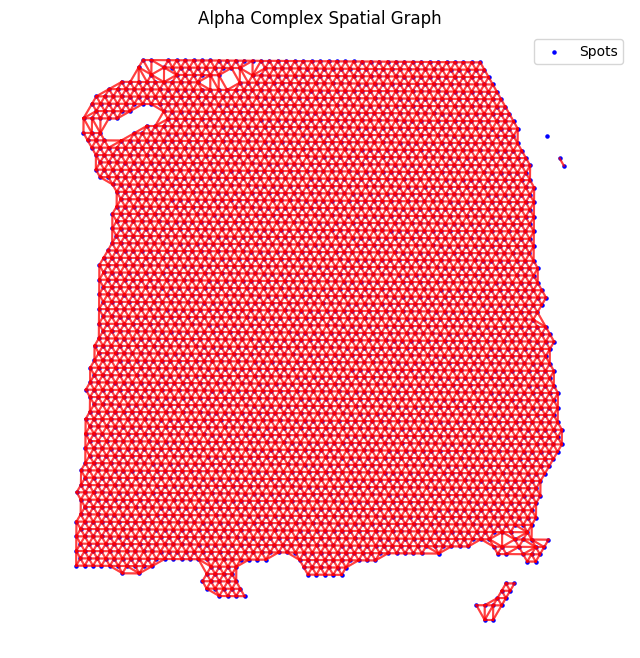

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

pts = adata73_sp.obsm['spatial']

edges = adata73_sp.obsp['scanit-graph']

row, col = edges.nonzero()

plt.figure(figsize=(8,8))
plt.scatter(pts[:,0], pts[:,1], c='blue', s=5, label='Spots')

for i, j in zip(row, col):
    x = [pts[i,0], pts[j,0]]
    y = [pts[i,1], pts[j,1]]
    plt.plot(x, y, color='red', alpha=0.5)

plt.title('Alpha Complex Spatial Graph')
plt.axis('equal')
plt.axis('off')
plt.legend()
plt.show()
plt.savefig("alpha_complex_73.png", dpi=300, bbox_inches='tight')

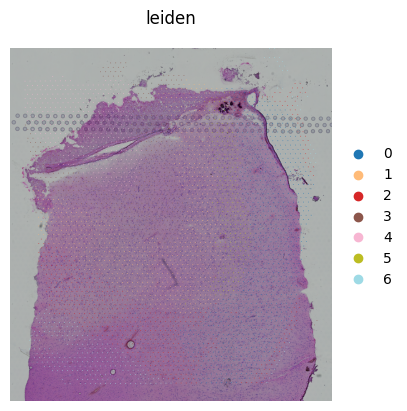

In [94]:
# builds a graph of similar cells/spots based on the existing low-dimensional SCAN-IT embedding.
sc.pp.neighbors(adata73_sp, use_rep='X_scanit', n_neighbors=10)
# finds clusters within that graph using Leiden clustering algorithm.
sc.tl.leiden(adata73_sp, resolution=0.13)
sc.pl.spatial(adata73_sp, spot_size=20, color='leiden', frameon=False, palette='tab20')
# plt.savefig("151673_leiden.png", dpi=300, bbox_inches='tight')

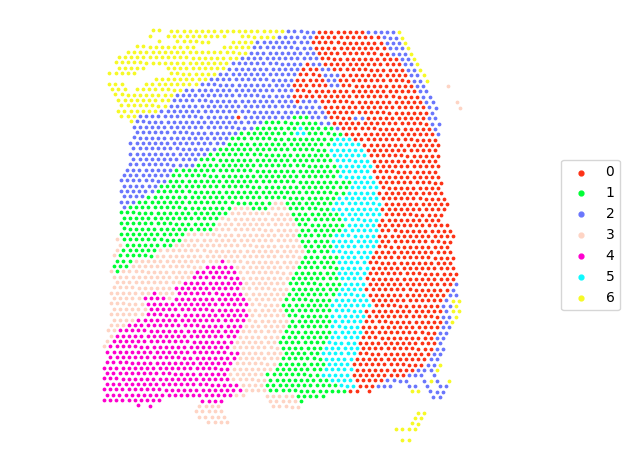

In [95]:
import plotly
pts = adata73_sp.obsm['spatial']
color_list = plotly.colors.qualitative.Light24
labels_pred = np.array( adata73_sp.obs['leiden'], int )
labels = list(set(labels_pred))
labels = list(np.sort(labels))
for j in range(len(labels)):
    label = labels[j]
    idx = np.where(labels_pred == label)[0]
    plt.scatter(pts[idx,0], pts[idx,1], c=color_list[j], label = label, s=3)
plt.axis('equal')
plt.axis('off')
plt.legend(markerscale=2, loc='center left', bbox_to_anchor=(1,0.5))
plt.tight_layout()
# plt.savefig("151673_spatial.png", dpi=300, bbox_inches='tight')

In [96]:
X_scanit = adata73_sp.obsm["X_scanit"]

In [97]:
encoder = LabelEncoder()

flat_arr = np.array([adata73_sp.obs['sce.layer_guess']]).ravel()
encoder.fit(flat_arr)

label_true = encoder.transform(flat_arr)

In [98]:
adata73_sp.obs

,in_tissue,array_row,array_col,sce.sample_name,sce.layer_guess,leiden
AAACAAGTATCTCCCA-1,1,50,102,151673,Layer3,0
AAACAATCTACTAGCA-1,1,3,43,151673,Layer1,6
AAACACCAATAACTGC-1,1,59,19,151673,WM,4
AAACAGAGCGACTCCT-1,1,14,94,151673,Layer3,0
AAACAGCTTTCAGAAG-1,1,43,9,151673,Layer5,1
...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1,1,58,42,151673,WM,4
TTGTTTCATTAGTCTA-1,1,60,30,151673,WM,4
TTGTTTCCATACAACT-1,1,45,27,151673,Layer6,3
TTGTTTGTATTACACG-1,1,73,41,151673,WM,3


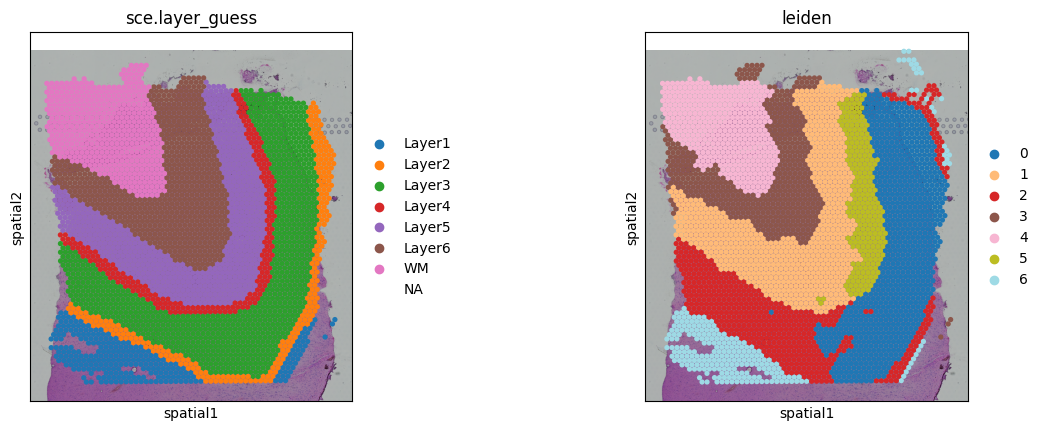

In [99]:
sc.pl.spatial(adata73_sp, color=["sce.layer_guess","leiden"], size=1.5)

In [100]:
normalized_mutual_info_score(label_true, adata73_sp.obs['leiden'])

0.6276080733857287

In [128]:
nmis = []
for i in range(10):
    # adata73_s = adata73_sp.copy()
    scanit.tl.spatial_graph(adata73_sp, method='alpha shape', alpha_n_layer=1, knn_n_neighbors=5)
    scanit.tl.spatial_representation(adata73_sp, n_h=10, n_epoch=3000, lr=0.001, device='mps', n_consensus=3, projection='mds', 
    python_seed=i, torch_seed=i, numpy_seed=i, n_comps_proj = 10)

    sc.pp.neighbors(adata73_sp, use_rep='X_scanit', n_neighbors=10)
    sc.tl.leiden(adata73_sp, resolution=0.15)
    encoder = LabelEncoder()
    flat_arr = np.array(adata73_sp.obs['sce.layer_guess']).ravel()
    encoder.fit(flat_arr)
    label_true = encoder.transform(flat_arr)
    label_pred = np.array(adata73_sp.obs['leiden'], dtype=int)
    nmi = normalized_mutual_info_score(label_true, label_pred)
    nmis.append(nmi)
nmis

Epoch: 000, Loss: 1.3984
Epoch: 500, Loss: 0.0803
Epoch: 1000, Loss: 0.0335
Epoch: 1500, Loss: 0.0230
Epoch: 2000, Loss: 1.5046
Epoch: 2500, Loss: 0.0216
Epoch: 2999, Loss: 0.0266
Epoch: 000, Loss: 2.9165
Epoch: 500, Loss: 0.0531
Epoch: 1000, Loss: 0.0303
Epoch: 1500, Loss: 0.0178
Epoch: 2000, Loss: 0.0088
Epoch: 2500, Loss: 0.0463
Epoch: 2999, Loss: 0.0212
Epoch: 000, Loss: 1.4978
Epoch: 500, Loss: 0.0581
Epoch: 1000, Loss: 0.0180
Epoch: 1500, Loss: 0.0113
Epoch: 2000, Loss: 0.0144
Epoch: 2500, Loss: 0.0868
Epoch: 2999, Loss: 0.0204


/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h

Epoch: 000, Loss: 1.7003
Epoch: 500, Loss: 0.1736
Epoch: 1000, Loss: 0.1126
Epoch: 1500, Loss: 0.0751
Epoch: 2000, Loss: 0.0719
Epoch: 2500, Loss: 0.0531
Epoch: 2999, Loss: 0.0429
Epoch: 000, Loss: 1.8430
Epoch: 500, Loss: 0.1386
Epoch: 1000, Loss: 0.0756
Epoch: 1500, Loss: 2.4641
Epoch: 2000, Loss: 0.0374
Epoch: 2500, Loss: 0.0277
Epoch: 2999, Loss: 0.0276
Epoch: 000, Loss: 4.6592
Epoch: 500, Loss: 0.1136
Epoch: 1000, Loss: 0.0391
Epoch: 1500, Loss: 0.0295
Epoch: 2000, Loss: 0.0247
Epoch: 2500, Loss: 0.0244
Epoch: 2999, Loss: 0.0144
Epoch: 000, Loss: 5.5226
Epoch: 500, Loss: 0.1220
Epoch: 1000, Loss: 0.0516
Epoch: 1500, Loss: 0.0212
Epoch: 2000, Loss: 0.0174
Epoch: 2500, Loss: 0.0349
Epoch: 2999, Loss: 0.0254
Epoch: 000, Loss: 1.8764
Epoch: 500, Loss: 0.0967
Epoch: 1000, Loss: 0.0838
Epoch: 1500, Loss: 0.0399
Epoch: 2000, Loss: 0.0151
Epoch: 2500, Loss: 0.0223
Epoch: 2999, Loss: 0.0105
Epoch: 000, Loss: 1.6890
Epoch: 500, Loss: 0.0695
Epoch: 1000, Loss: 0.0440
Epoch: 1500, Loss: 0.036

/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.11/3.11.13/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


Epoch: 000, Loss: 2.4831
Epoch: 500, Loss: 0.0345
Epoch: 1000, Loss: 0.0084
Epoch: 1500, Loss: 0.0154
Epoch: 2000, Loss: 0.0099
Epoch: 2500, Loss: 0.0196
Epoch: 2999, Loss: 0.0050
Epoch: 000, Loss: 2.5382
Epoch: 500, Loss: 0.0843
Epoch: 1000, Loss: 0.0449
Epoch: 1500, Loss: 0.0415
Epoch: 2000, Loss: 0.0321
Epoch: 2500, Loss: 0.0267
Epoch: 2999, Loss: 0.0208
Epoch: 000, Loss: 2.9906
Epoch: 500, Loss: 1.3863
Epoch: 1000, Loss: 1.3862
Epoch: 1500, Loss: 1.3857
Epoch: 2000, Loss: 1.3870
Epoch: 2500, Loss: 1.3850
Epoch: 2999, Loss: 0.1121


[0.5807109129677998,
 0.4740249004973213,
 0.5859303936871675,
 0.5299669739183375,
 0.49828619098837484,
 0.4422950526354131,
 0.526412536634439,
 0.46745217147967516,
 0.5817934344655966,
 0.4552784917669021]

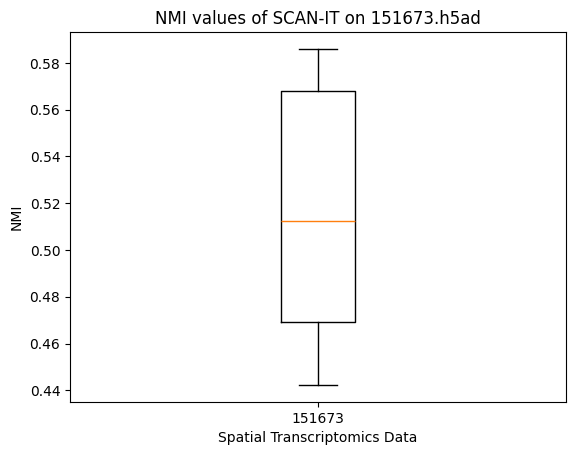

In [129]:
plt.boxplot(nmis, labels=['151673'])
plt.title('NMI values of SCAN-IT on 151673.h5ad')
plt.ylabel('NMI')
plt.xlabel('Spatial Transcriptomics Data')
plt.savefig("nmi2.png", dpi=300, bbox_inches='tight')

In [130]:
np.mean(nmis)

0.5142151059041027